# 학습목표
- 한글 텍스트 전처리 방법 실습
  - 토큰화, 인코딩, 임베딩

- 영화리뷰 데이터 감성분류
  - DNN

- RNN 학습
  - 영화리뷰 데이터 감성분류

- 구글 드라이브 연동
- 작업 폴더로 이동

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝

/content/drive/MyDrive/Colab Notebooks/23.12.18딥러닝


In [ ]:
# 폴더 내용 확인
!ls

'01_텍스트 전처리.ipynb'					 flagged
 02_영화리뷰감성분석.ipynb					 model
 animal_model							 modelfashion_model_01_0.704.hdf5
 CNN_소리데이터학습.ipynb					 modelfashion_model_02_0.730.hdf5
 data								 modelfashion_model_03_0.830.hdf5
'ex00_동물 10가지 분류 모델 만들기.ipynb'			 modelfashion_model_04_0.832.hdf5
'ex01_닮은꼴 예측 앱 만들기.ipynb'				 modelfashion_model_05_0.845.hdf5
 ex02_YoloV7기반_Custom데이터로_객체탐지.ipynb			 modelfashion_model_06_0.854.hdf5
'ex03_퍼셉트론, 다층퍼셉트론(MLP) 만들기.ipynb'			 modelfashion_model_08_0.862.hdf5
'ex04_딥러닝 이진분류 실습.ipynb'				 modelfashion_model_10_0.868.hdf5
'ex05_iris데이터 다중분류실습.ipynb'				 modelfashion_model_11_0.877.hdf5
'ex06_mlp활성화 함수, 최적화 함수 비교_패션 데이터 실습.ipynb'	 yolo_project
 ex07_개,고양이_데이터전처리.ipynb				'YOLOv5 사용하기.ipynb'
'ex08_mlp,cnn_개,고양이_이진분류 실습.ipynb'			 임혜지.ipynb
 face_model


In [6]:
import pandas as pd

data = pd.read_table('./data/ratings_train.txt')

In [7]:
data.head()
# document : 댓글
# label : 긍정(1), 부정(0)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


- 데이터 확인

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


- 결측치 삭제

In [8]:
# how='any' 결측치가 하나라도 존재하면 삭제
data=data.dropna(how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


- 댓글에서 한글하고 공백만 추출

In [9]:
# [가-힣] : 가 부터 힣까지 문자를 의미(한글 자음,모음으로 조합 할 수 있는 모든 문자)
# [^가-힣] : 가 부터 힣까지 문자를 제외한 모든 문자
# [^가-힣 ] : 한글과 공백을 제외한 모든 문자
# [ㄱ-ㅎㅏ-ㅣ] : 한글 자음 모음
# [0-9] : 숫자
# [a-zA-Z] : 영문자
data["document"]=data["document"].str.replace("[^가-힣 ]","")

<ipython-input-9-7279096b0d93>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data["document"]=data["document"].str.replace("[^가-힣 ]","")


In [ ]:
data.head(30)

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


- 한글만 추출해서 생기는 빈 댓글 확인

In [10]:
# data.loc[data['document']==""]
# 빈 공백들이 있는 빈 데이터는 검색이 안됨

# 양쪽의 빈 공백이 제거된 데이터를 검색
# data['document'] 데이터가 빈 공백이 아닌 데이터만 새로 저장
data=data.loc[data['document'].str.strip()!=""]

print(data.loc[data['document'].str.strip()==""])


Empty DataFrame
Columns: [id, document, label]
Index: []


In [ ]:
data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


- 토큰화
  - 한글을 형태소로 토큰화
  - 불용어 (stopword) 삭제

In [14]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 50.2 MB/s eta 0:00:00


In [11]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
import konlpy
from konlpy.tag import Okt
from tqdm import tqdm

okt=Okt()

In [16]:
result=[]

# document 컬럼의 값을 하나씩 불러와서 sentence에 할당
for sentence in tqdm(data['document']):
  temp = []

  # 형태소 분리
  temp = okt.morphs(sentence)

  # 불용어 제거
  # 분리된 형태소 토큰을 하나씩 불러온다
  #for word in temp :

    # 형태소가 불용어에 포함되지 않는다면
    #if word not in stopwords:

      # 토큰을 저장
      #temp.append(word)

  # 위 코드 대신에 사용
  temp = [word for word in temp if word not in stopwords]


  # 형태소를 저장
  result.append(temp)

  3%|▎         | 4010/148385 [00:33<20:21, 118.15it/s]


KeyboardInterrupt: 

- 토큰화된 결과를 저장

In [4]:
# 파이썬 데이터 타입 그대로 저장
import pickle

# with : 사용한 객체를 자동으로 닫아준다.
with open('./data/tokenized_data.pkl','wb') as f:
  pickle.dump(result,f)

NameError: name 'result' is not defined

- 저장된 파일 불러오기

In [18]:
import pickle

# rd : read binary
with open('./data/tokenized_data.pkl','rb') as f:
  result2=pickle.load(f)

In [ ]:
result2[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍지', '않구나'],
 ['너', '무재', '밓었', '다그', '래서', '보는것을', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스런',
  '연기',
  '돋보였던',
  '영화',
  '스파이더맨',
  '에서',
  '늙어',
  '보이기만',
  '했던',
  '커스틴',
  '던스트',
  '너무나도',
  '이뻐',
  '보였다']]

In [19]:
with open('./data/label.pkl','wb') as f :
  pickle.dump(data['label'],f)

In [21]:
with open('./data/label.pkl','rb') as f :
  label=pickle.load(f)

In [23]:
len(result2),len(label)

(148385, 148385)

# 인코딩

- Tokenizer() 로 인코딩
  - fit_on_texts() : 빈도수 분석, 정렬, 인덱스 부여
  - text_to_sequences() : 인코딩
- padding : pad_sequences()

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 빈도수 분석, 정렬, 인덱스 부여
# 최대 단어 수 (인덱스는 1-35000까지 부여)
max_features=35000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(result2)

# 인코딩
encoded = tokenizer.texts_to_sequences(result2)


In [25]:
encoded[:5]

[[39, 410, 8, 6545, 615],
 [877, 411, 31, 556, 1, 176, 1507, 12, 926, 6184, 25652],
 [346, 2783, 2553, 7267, 11959, 182, 4],
 [8519, 85, 10482, 200, 45, 61, 13, 4300],
 [992,
  32143,
  17,
  32144,
  12,
  6356,
  1,
  2942,
  11,
  5235,
  433,
  21728,
  32145,
  1058,
  3519,
  4482]]

- padding

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words=30
padded=pad_sequences(encoded,maxlen=max_words)

In [27]:
padded[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    39,   410,
            8,  6545,   615],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   877,   411,    31,   556,     1,   176,  1507,    12,
          926,  6184, 25652],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,   346,  2783,  2553,  7267,
        11959,   182,     4],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  8519,    85, 10482,   200,    45,
           61,    13,  4300],
       [    0,     0,     0,

# 학습 모델 설계 (Dense 층으로 구성)

- Embedding()층을 이용해서 워드 임베딩을 수행
- Dense()층을 이용해서 학습

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten

model1=Sequential()
# max_features : 사용하는 최대 단어수
# 100 : 차원수 (한개의 단어가 몇개의 단어와 관계를 맺을 것인지 설정)
# input_length : 입력 데이터의 길이
model1.add(Embedding(max_features,100,input_length=max_words))
model1.add(Flatten())
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           3500000   
                                                                 
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 1)                 3001      
                                                                 
Total params: 3503001 (13.36 MB)
Trainable params: 3503001 (13.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# prompt: model1.fit(validation_data=)

h=model1.fit(padded,label,epochs=10,batch_size=32, validation_split=0.3)


Epoch 1/10
3246/3246 [==============================] - 20s 6ms/step - loss: 0.1445 - accuracy: 0.9452 - val_loss: 0.1601 - val_accuracy: 0.9370
Epoch 2/10
3246/3246 [==============================] - 19s 6ms/step - loss: 0.0934 - accuracy: 0.9664 - val_loss: 0.1979 - val_accuracy: 0.9234
Epoch 3/10
3246/3246 [==============================] - 22s 7ms/step - loss: 0.0721 - accuracy: 0.9741 - val_loss: 0.2442 - val_accuracy: 0.9110
Epoch 4/10
3246/3246 [==============================] - 21s 7ms/step - loss: 0.0589 - accuracy: 0.9785 - val_loss: 0.3085 - val_accuracy: 0.9003
Epoch 5/10
3246/3246 [==============================] - 19s 6ms/step - loss: 0.0509 - accuracy: 0.9815 - val_loss: 0.3738 - val_accuracy: 0.8877
Epoch 6/10
3246/3246 [==============================] - 20s 6ms/step - loss: 0.0456 - accuracy: 0.9832 - val_loss: 0.4467 - val_accuracy: 0.8774
Epoch 7/10
3246/3246 [==============================] - 19s 6ms/step - loss: 0.0415 - accuracy: 0.9845 - val_loss: 0.5312 - val_ac

- 예측하기

In [ ]:
index = 12

pred=model1.predict(padded[index:index+1])

print("원 데이터 : ",label[index:index+1])

if pred > 0.5:
  print('긍정')
else:
  print('부정')

1/1 [==============================] - 0s 30ms/step
원 데이터 :  12    0
Name: label, dtype: int64
부정


- 학습된 모델을 이용하여 직접 댓글을 입력해서 긍정/부정 판별하기

In [2]:
comment = input("댓글을 입력하세요 : ")

# 한글과 공백만 추출
comment = comment.replace("[^가-힣 ]","")
# 토큰화 불용어 제거
token = okt.morphs(comment)
token = [word for word in comment if word not in stopwords]

# 인코딩
encoded = tokenizer.texts_to_sequences([token])

# padding
padded = pad_sequences(encoded, maxlen=max_words)

# 예측
pred = model1.predict(padded)

# 결과 출력
if pred > 0.5:
  print('긍정')
else :
  print('부정')

댓글을 입력하세요 : 123


NameError: name 'okt' is not defined

- LSTM 을 이용한 모델 설계

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM

model2=Sequential()
# max_features : 사용하는 최대 단어수
# 100 : 차원수 (한개의 단어가 몇개의 단어와 관계를 맺을 것인지 설정)
# input_length : 입력 데이터의 길이
model2.add(Embedding(max_features,100,input_length=max_words))
model2.add(LSTM(128))

# RNN의 결과는 1차원이므로 Flatten()이 필요없다
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 100)           3500000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3617377 (13.80 MB)
Trainable params: 3617377 (13.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
h2=model2.fit(padded,label,epochs=10,batch_size=32, validation_split=0.3)

Epoch 1/10
3246/3246 [==============================] - 26s 8ms/step - loss: 0.0259 - accuracy: 0.9894 - val_loss: 1.0637 - val_accuracy: 0.8269
Epoch 2/10
3246/3246 [==============================] - 25s 8ms/step - loss: 0.0232 - accuracy: 0.9906 - val_loss: 1.1069 - val_accuracy: 0.8222
Epoch 3/10
3246/3246 [==============================] - 24s 8ms/step - loss: 0.0202 - accuracy: 0.9919 - val_loss: 1.1712 - val_accuracy: 0.8235
Epoch 4/10
3246/3246 [==============================] - 25s 8ms/step - loss: 0.0187 - accuracy: 0.9921 - val_loss: 1.1934 - val_accuracy: 0.8239
Epoch 5/10
3246/3246 [==============================] - 23s 7ms/step - loss: 0.0168 - accuracy: 0.9928 - val_loss: 1.2576 - val_accuracy: 0.8257
Epoch 6/10
3246/3246 [==============================] - 24s 7ms/step - loss: 0.0159 - accuracy: 0.9930 - val_loss: 1.3900 - val_accuracy: 0.8212
Epoch 7/10
3246/3246 [==============================] - 25s 8ms/step - loss: 0.0156 - accuracy: 0.9932 - val_loss: 1.3068 - val_ac

- Attention 추가하기

In [ ]:
!pip install attention

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from attention import Attention

model3=Sequential()

# max_features : 사용하는 최대 단어수
# 100 : 차원수 (한개의 단어가 몇개의 단어와 관계를 맺을 것인지 설정)
# input_length : 입력 데이터의 길이
model3.add(Embedding(max_features,100,input_length=max_words))

# Attention 은 각 LSTM 층의 결과값이 필요하므호 return_sequences를 True로 설정
model3.add(LSTM(128, return_sequences=True))
model3.add(Attention())

# RNN의 결과는 1차원이므로 Flatten()이 필요없다
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 100)           3500000   
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           117248    
                                                                 
 attention (Attention)       (None, 128)               49152     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3666529 (13.99 MB)
Trainable params: 3666529 (13.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# prompt: 컴파일

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
# prompt: 학습

h3=model3.fit(padded,label,epochs=10,batch_size=32, validation_split=0.3)


Epoch 1/10
3246/3246 [==============================] - 31s 10ms/step - loss: 0.0264 - accuracy: 0.9896 - val_loss: 0.9499 - val_accuracy: 0.8269
Epoch 2/10
3246/3246 [==============================] - 29s 9ms/step - loss: 0.0242 - accuracy: 0.9906 - val_loss: 0.9774 - val_accuracy: 0.8208
Epoch 3/10
3246/3246 [==============================] - 29s 9ms/step - loss: 0.0216 - accuracy: 0.9911 - val_loss: 0.9866 - val_accuracy: 0.8213
Epoch 4/10
3246/3246 [==============================] - 30s 9ms/step - loss: 0.0205 - accuracy: 0.9916 - val_loss: 1.0573 - val_accuracy: 0.8221
Epoch 5/10
3246/3246 [==============================] - 29s 9ms/step - loss: 0.0193 - accuracy: 0.9920 - val_loss: 1.1217 - val_accuracy: 0.8231
Epoch 6/10
3246/3246 [==============================] - 30s 9ms/step - loss: 0.0178 - accuracy: 0.9926 - val_loss: 0.9488 - val_accuracy: 0.8217
Epoch 7/10
3246/3246 [==============================] - 28s 9ms/step - loss: 0.0174 - accuracy: 0.9926 - val_loss: 0.9780 - val_a

- LSTM과 Attention 결과 비교하기

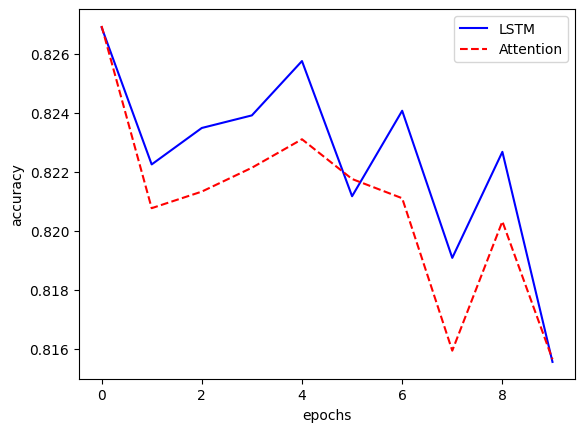

In [44]:
import matplotlib.pyplot as plt

plt.plot(h2.history['val_accuracy'],'b-',label='LSTM')
plt.plot(h3.history['val_accuracy'],'r--',label='Attention')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()
plt.show()
